# Import libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib as mpl

#  Read all the files:

In [2]:
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
products = pd.read_csv('products.csv')
order_products__prior = pd.read_csv('order_products__prior.csv')
order_products__train = pd.read_csv('order_products__train.csv')
orders = pd.read_csv('orders.csv')

# The relationship between the files is given in the following image:

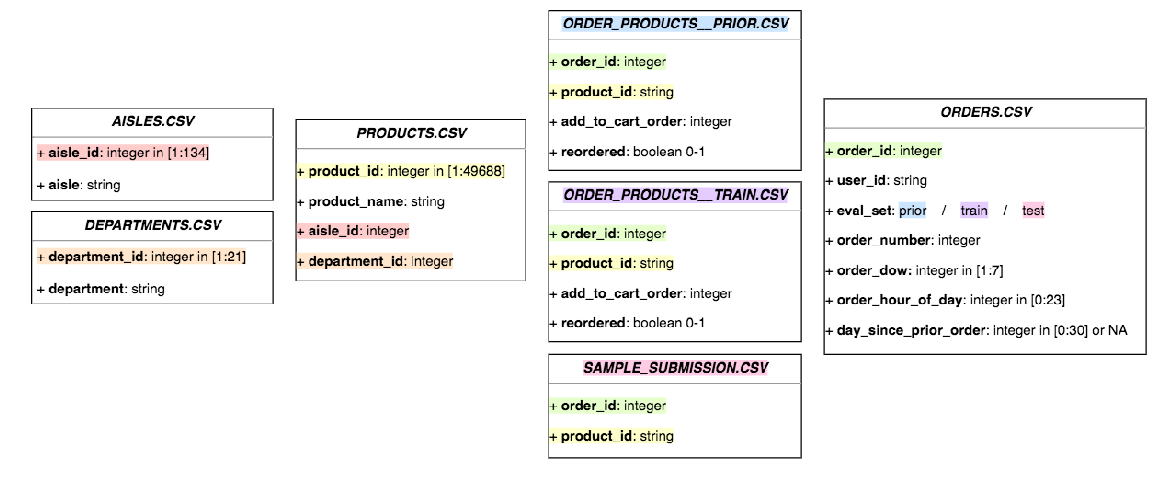

In [251]:
mpl.rcParams['figure.figsize'] = (20,20)
plt.figure()
plt.axis('off')
plt.imshow(plt.imread('instacart_Files.png'))

# Lets explore the data:

**Number of orders:**

In [296]:
orders['order_id'].nunique()

3421083

**Number of prior data:**

In [285]:
order_products__prior['order_id'].nunique()

3214874

**Number of train data:**

In [286]:
order_products__train['order_id'].nunique()

131209

**Number of test data:**

In [297]:
orders[orders['eval_set']=='test']['order_id'].nunique()

75000

**Sanity check:**

In [288]:
3421083-(3214874+131209)

75000

## The features we have are: 
1. user id.
2. order number
3. order day of week (order_dow)
4. order hour of day
5. day since prior order
6. products in order (It's contain information about the aisles & departments)

## Summary:
### We have information on 3421083 orders (which are the number of observations), 5 numerical features and 1 "complex" feature (products).


# Missing values:
### we have missing values in the *days_since_prior_order* feature. This missing value is intent- It appear if it is the first order of the user. We thought to replace it with a large number (say 400). The rationale behind this thought is that a large number of days between orders is equivalent to new user in some sense.

# Ideas for feature engineering:
1. Break *hour_of_day* feature to 2 features in order to use the fact that hour 23 is close to hour 0.
2. Split the *product* feature to 50000 (number of products) features using "one-hot" encoding to specify that a product is purchased in this order. 
3. Rearrange *user_id* feature (maybe also break it to many features) such that consecutive *user_id* will be "close" in some sense.

# Idea for data from additional source:
Prices of the products.

# Few interesting visualizations on the data:

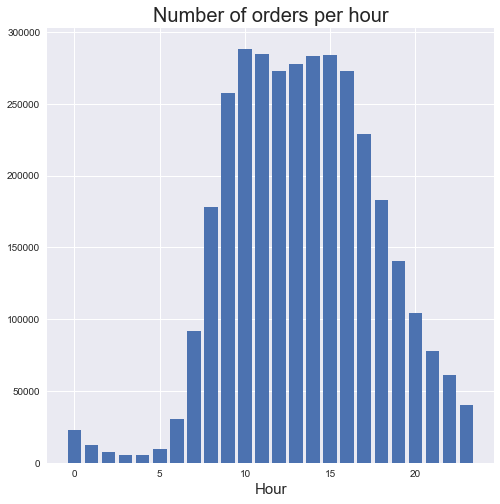

In [301]:
countHour = np.zeros(24)
for r,i in orders['order_hour_of_day'].iteritems():
    countHour[i] = countHour[i]+1
mpl.rcParams['figure.figsize'] = (8,8)
plt.bar(np.arange(24),countHour)
plt.title('Number of orders per hour',fontsize=20)
plt.xlabel('Hour',fontsize=15)

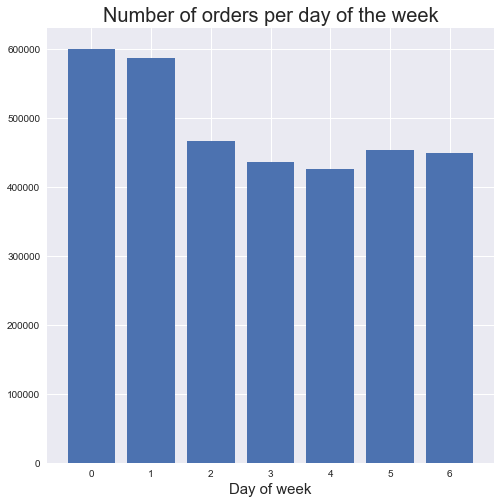

In [316]:
countDays = np.zeros(7)
for r,i in orders['order_dow'].iteritems():
    countDays[i] = countDays[i]+1
mpl.rcParams['figure.figsize'] = (8,8)
plt.bar(np.arange(7),countDays)
plt.title('Number of orders per day of the week',fontsize=20)
plt.xlabel('Day of week',fontsize=15)

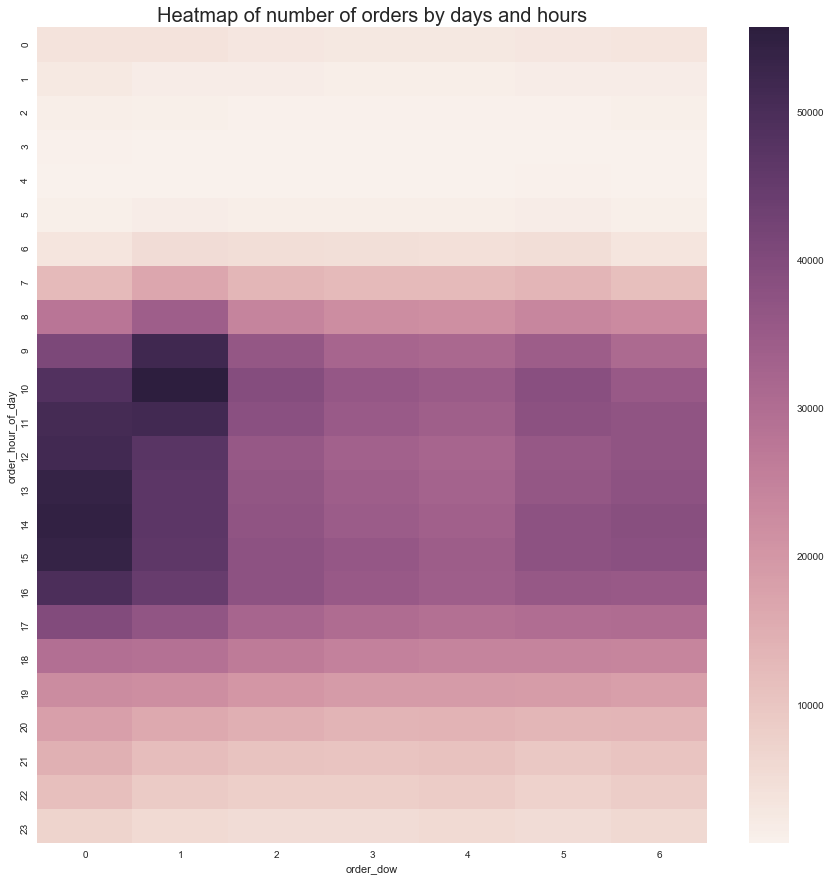

In [318]:
groupDayHour = orders.groupby(by=['order_hour_of_day','order_dow']).count()['order_id'].unstack()
mpl.rcParams['figure.figsize'] = (15,15)
sns.heatmap(groupDayHour)
plt.title('Heatmap of number of orders by days and hours',fontsize=20)

## We can learn from the graphs that most of the purchases occurred during day time (9-17), and in weekends rather than in the middle of the week.

1868044    train
Name: eval_set, dtype: object

In [47]:
def checkProductInNextOrder(nextOrder,productId):
    file = orders[orders['order_id']==nextOrder]['eval_set'].unique()[0]
    if file == 'prior':
        listOfProducts = order_products__prior[order_products__prior['order_id']==nextOrder]['product_id'].unique()
    else:
        listOfProducts = order_products__train[order_products__train['order_id']==nextOrder]['product_id'].unique()
    
    return productId in listOfProducts

In [59]:
x=np.nan
x

nan

In [48]:
import time

In [62]:
userId=[]
orderNum=[]
orderDow=[]
orderHour=[]
daysSincePrior=[]
productId=[]
futureBuy=[]
rows = 0;

orders_test=orders[1:10]
start=time.time()

for index, row in orders_test.iterrows():
    if row['eval_set'] == 'prior':
        nextEval = orders.loc[index+1,'eval_set']
        if nextEval != 'test':
            user = row['user_id']
            order_number = row['order_number']
            order_dow = row['order_dow']
            order_hour = row['order_hour_of_day'] 
            if np.isnan(row['days_since_prior_order']):
                days_prior = 400
            else:
                days_prior = row['days_since_prior_order'] 
            orderId = row['order_id']
            products = order_products__prior[order_products__prior['order_id'] == orderId]['product_id']
            for z2,k in products.iteritems():
                userId.append(user)
                orderNum.append(order_number)
                orderDow.append(order_dow)
                orderHour.append(order_hour)
                daysSincePrior.append(days_prior)
                productId.append(k)
                futureBuy.append(checkProductInNextOrder(orders.loc[index+1,'order_number'],k))
                rows=rows+1
                
end=time.time()
print(end-start)

2.7619998455047607


In [46]:
orders_test=orders[1:3]
orders_test.head()

order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   

   days_since_prior_order  
1                    15.0  
2                    21.0

In [43]:

aaa = np.column_stack([userId,orderNum,orderDow,orderHour,daysSincePrior,productId,futureBuy])
df = pd.DataFrame(aaa,columns=['user_id', 'order_number', 'order_dow', 'order_hour', 'days_since_prior','product_id','future_buy'])
df.head()

In [44]:
df.head()

user_id  order_number  order_dow  order_hour  days_since_prior  product_id  \
0      1.0           1.0        2.0         8.0             400.0       196.0   
1      1.0           1.0        2.0         8.0             400.0     14084.0   
2      1.0           1.0        2.0         8.0             400.0     12427.0   
3      1.0           1.0        2.0         8.0             400.0     26088.0   
4      1.0           1.0        2.0         8.0             400.0     26405.0   

   future_buy  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 7 columns):
user_id             388 non-null float64
order_number        388 non-null float64
order_dow           388 non-null float64
order_hour          388 non-null float64
days_since_prior    388 non-null float64
product_id          388 non-null float64
future_buy          388 non-null float64
dtypes: float64(7)
memory usage: 21.3 KB


In [64]:
def orderId2orderNum(x):
    return(orders[orders['order_id']==x]['order_number'].unique()[0])

In [66]:
start=time.time()
temp=order_products__prior[0:10000]
temp['order_number'] = temp['order_id'].apply(orderId2orderNum)
end=time.time()

print(end-start)

46.49799990653992


C:\Program Files\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
